In [51]:
import pandas as pd
from datetime import datetime
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.sandbox.regression.predstd import wls_prediction_std
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv(r'C:\Users\1130j\Desktop\Yale\Twitter_Covid\Data\Master-file.csv')
df2= pd.read_excel(r'C:\Users\1130j\Desktop\Yale\Twitter_Covid\Data\demogStates.xlsx')

In [11]:
df.head(5)

,Unnamed: 0,date,STATEFP,total,facet1,facet2,facet3,facet4,facet5,facet6,facet1p,facet2p,facet3p,facet4p,facet5p,facet6p,user_count,facet1_user,facet2_user,facet3_user,facet4_user,facet5_user,facet6_user,facet1_weighted,facet2_weighted,facet3_weighted,facet4_weighted,facet5_weighted,facet6_weighted,weighted_sum,weighted_sum_v2,fips,state_name,state_abbr,long_name,state,statename,D,E,F,G,H,ratio,log_ratio,days_since,mobility_dri,Covid_cases
0,1,4/1/20,2,27,4,3,0,1,3,1,0.148148,0.111111,0.000000,0.037037,0.111111,0.037037,22,4,3,0,1,3,1,0.026936,0.015152,0.000000,0.001684,0.015152,0.001684,0.060606,0.058923,2,Alaska,AK,Alaska AK,AK,Alaska,596,328,49.0,44,4.1,0.134146,-2.008824,0,-32.22,142.0
1,2,4/1/20,5,96,17,3,0,5,6,3,0.177083,0.031250,0.000000,0.052083,0.062500,0.031250,80,15,3,0,5,6,3,0.033203,0.001172,0.000000,0.003255,0.004687,0.001172,0.043490,0.040234,5,Arkansas,AR,Arkansas AR,AR,Arkansas,5301,5497,49.1,345,3.2,0.062762,-2.768413,0,-21.74,584.0
2,3,4/1/20,6,2336,402,72,38,60,307,112,0.172089,0.030822,0.016267,0.025685,0.131421,0.047945,1814,374,72,37,59,280,101,0.035480,0.001223,0.000332,0.000835,0.020286,0.002669,0.060826,0.059991,6,California,CA,California CA,CA,California,40048,36499,52.5,5373,7.0,0.147210,-1.915898,0,-50.38,9415.0
3,4,4/1/20,10,16,2,1,0,0,2,0,0.125000,0.062500,0.000000,0.000000,0.125000,0.000000,12,2,1,0,0,2,0,0.020833,0.005208,0.000000,0.000000,0.020833,0.000000,0.046875,0.046875,10,Delaware,DE,Delaware DE,DE,Delaware,846,757,52.8,95,5.9,0.125495,-2.075486,0,-39.07,368.0
4,5,4/1/20,13,518,103,17,4,13,54,25,0.198842,0.032819,0.007722,0.025097,0.104247,0.048263,407,95,17,3,13,52,24,0.046413,0.001371,0.000057,0.000802,0.013319,0.002846,0.064807,0.064005,13,Georgia,GA,Georgia GA,GA,Georgia,13634,9648,58.2,2252,9.6,0.233416,-1.454932,0,-36.00,4638.0


In [12]:
df2.head(5)

,state,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,TOT_POP,TOT_MALE,TOT_FEMALE,male_prop,female_prop,WA_MALE,wa_male_prop,WA_FEMALE,wa_female,BA_MALE,ba_male_prop,BA_FEMALE,ba_female_prop,IA_MALE,ia_male_prop,IA_FEMALE,ia_female_prop,AA_MALE,aa_male_prop,AA_FEMALE,aa_female_prop,NA_MALE,na_male_prop,NA_FEMALE,na_female_prop,WHITE,white_prop,BLACK,black_prop,AA,AA_prop,IA,IA_prop,NA,NA_prop,0_18,19_25,26_34,35_54,55_64,65_more,65_more_prop,state_name
0,.Alabama,2145968,2082404,63564,4767100,2246161,2397701,0.471180,0.502968,1582594,0.704577,1643231,0.685336,571142,0.254275,656787,0.273924,16260,0.007239,15745,0.006567,33703,0.015005,38282,0.015966,2594,0.001155,2438,0.001017,3225825,0.694643,1227929,0.264420,71985,0.015100,32005,0.006714,5032,0.001056,1128100,414500,549500,1195300,645000,834700,0.175096,Alabama
1,.Alaska,317662,299021,18641,701700,349589,324074,0.498203,0.461841,239476,0.685022,213948,0.660183,14666,0.041952,11879,0.036655,44684,0.127819,44400,0.137006,20243,0.057905,23747,0.073276,4949,0.014157,4937,0.015234,453424,0.673072,26545,0.039404,43990,0.062691,89084,0.126955,9886,0.014089,181700,65300,97500,172900,92800,91500,0.130398,Alaska
2,.Arizona,3551259,3384504,166755,7098000,3565339,3606307,0.502302,0.508074,2953694,0.828447,2984112,0.827470,187493,0.052588,176787,0.049022,187347,0.052547,192813,0.053465,124070,0.034799,139626,0.038717,10528,0.002953,9261,0.002568,5937806,0.827956,364280,0.050794,263696,0.037151,380160,0.053559,19789,0.002788,1701600,656800,860500,1708100,877500,1293600,0.182249,Arizona
3,.Arkansas,1217482,1175386,42096,2922500,1298580,1352416,0.444339,0.462760,1031115,0.794033,1060575,0.784208,196302,0.151167,219042,0.161963,13250,0.010203,13463,0.009955,23706,0.018255,24783,0.018325,5369,0.004135,5077,0.003754,2091690,0.789020,415344,0.156675,48489,0.016592,26713,0.009140,10446,0.003574,720800,253500,335600,723700,383200,505700,0.173037,Arkansas
4,.California,18299606,17577507,722099,38642700,18469427,18681864,0.477954,0.483451,13314942,0.720918,13206990,0.706942,1234785,0.066856,1257127,0.067291,304014,0.016460,294034,0.015739,2794562,0.151307,3092617,0.165541,93832,0.005080,95013,0.005086,26521932,0.713890,2491912,0.067075,5887179,0.152349,598048,0.015476,188845,0.004887,9171300,3539800,5288800,10152200,4751600,5739000,0.148514,California


In [13]:
df2['state'] = df2['state'].str.strip()
df2['state_name'] = df2['state'].str.replace('.','')
df2.head(5)

,state,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,TOT_POP,TOT_MALE,TOT_FEMALE,male_prop,female_prop,WA_MALE,wa_male_prop,WA_FEMALE,wa_female,BA_MALE,ba_male_prop,BA_FEMALE,ba_female_prop,IA_MALE,ia_male_prop,IA_FEMALE,ia_female_prop,AA_MALE,aa_male_prop,AA_FEMALE,aa_female_prop,NA_MALE,na_male_prop,NA_FEMALE,na_female_prop,WHITE,white_prop,BLACK,black_prop,AA,AA_prop,IA,IA_prop,NA,NA_prop,0_18,19_25,26_34,35_54,55_64,65_more,65_more_prop,state_name
0,.Alabama,2145968,2082404,63564,4767100,2246161,2397701,0.471180,0.502968,1582594,0.704577,1643231,0.685336,571142,0.254275,656787,0.273924,16260,0.007239,15745,0.006567,33703,0.015005,38282,0.015966,2594,0.001155,2438,0.001017,3225825,0.694643,1227929,0.264420,71985,0.015100,32005,0.006714,5032,0.001056,1128100,414500,549500,1195300,645000,834700,0.175096,Alabama
1,.Alaska,317662,299021,18641,701700,349589,324074,0.498203,0.461841,239476,0.685022,213948,0.660183,14666,0.041952,11879,0.036655,44684,0.127819,44400,0.137006,20243,0.057905,23747,0.073276,4949,0.014157,4937,0.015234,453424,0.673072,26545,0.039404,43990,0.062691,89084,0.126955,9886,0.014089,181700,65300,97500,172900,92800,91500,0.130398,Alaska
2,.Arizona,3551259,3384504,166755,7098000,3565339,3606307,0.502302,0.508074,2953694,0.828447,2984112,0.827470,187493,0.052588,176787,0.049022,187347,0.052547,192813,0.053465,124070,0.034799,139626,0.038717,10528,0.002953,9261,0.002568,5937806,0.827956,364280,0.050794,263696,0.037151,380160,0.053559,19789,0.002788,1701600,656800,860500,1708100,877500,1293600,0.182249,Arizona
3,.Arkansas,1217482,1175386,42096,2922500,1298580,1352416,0.444339,0.462760,1031115,0.794033,1060575,0.784208,196302,0.151167,219042,0.161963,13250,0.010203,13463,0.009955,23706,0.018255,24783,0.018325,5369,0.004135,5077,0.003754,2091690,0.789020,415344,0.156675,48489,0.016592,26713,0.009140,10446,0.003574,720800,253500,335600,723700,383200,505700,0.173037,Arkansas
4,.California,18299606,17577507,722099,38642700,18469427,18681864,0.477954,0.483451,13314942,0.720918,13206990,0.706942,1234785,0.066856,1257127,0.067291,304014,0.016460,294034,0.015739,2794562,0.151307,3092617,0.165541,93832,0.005080,95013,0.005086,26521932,0.713890,2491912,0.067075,5887179,0.152349,598048,0.015476,188845,0.004887,9171300,3539800,5288800,10152200,4751600,5739000,0.148514,California


In [14]:
dfinal = df.merge(df2, how='left', on='state_name')

In [19]:
dfinal['case_rate'] = dfinal['Covid_cases']/dfinal["TOT_POP"]

In [20]:
dfinal['log_case_rate'] = np.log(dfinal['case_rate'])

In [9]:
# dfinal.to_csv('facets_mobil_demog.csv')

In [24]:
dfinal.head(5)

,Unnamed: 0,date,STATEFP,total,facet1,facet2,facet3,facet4,facet5,facet6,facet1p,facet2p,facet3p,facet4p,facet5p,facet6p,user_count,facet1_user,facet2_user,facet3_user,facet4_user,facet5_user,facet6_user,facet1_weighted,facet2_weighted,facet3_weighted,facet4_weighted,facet5_weighted,facet6_weighted,weighted_sum,weighted_sum_v2,fips,state_name,state_abbr,long_name,state_x,statename,D,E,F,G,H,ratio,log_ratio,days_since,mobility_dri,Covid_cases,state_y,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,TOT_POP,TOT_MALE,TOT_FEMALE,male_prop,female_prop,WA_MALE,wa_male_prop,WA_FEMALE,wa_female,BA_MALE,ba_male_prop,BA_FEMALE,ba_female_prop,IA_MALE,ia_male_prop,IA_FEMALE,ia_female_prop,AA_MALE,aa_male_prop,AA_FEMALE,aa_female_prop,NA_MALE,na_male_prop,NA_FEMALE,na_female_prop,WHITE,white_prop,BLACK,black_prop,AA,AA_prop,IA,IA_prop,NA,NA_prop,0_18,19_25,26_34,35_54,55_64,65_more,65_more_prop,case_rate,log_case_rate
0,1,4/1/20,2,27,4,3,0,1,3,1,0.148148,0.111111,0.000000,0.037037,0.111111,0.037037,22,4,3,0,1,3,1,0.026936,0.015152,0.000000,0.001684,0.015152,0.001684,0.060606,0.058923,2,Alaska,AK,Alaska AK,AK,Alaska,596,328,49.0,44,4.1,0.134146,-2.008824,0,-32.22,142.0,.Alaska,317662,299021,18641,701700,349589,324074,0.498203,0.461841,239476,0.685022,213948,0.660183,14666,0.041952,11879,0.036655,44684,0.127819,44400,0.137006,20243,0.057905,23747,0.073276,4949,0.014157,4937,0.015234,453424,0.673072,26545,0.039404,43990,0.062691,89084,0.126955,9886,0.014089,181700,65300,97500,172900,92800,91500,0.130398,0.000202,-8.505434
1,2,4/1/20,5,96,17,3,0,5,6,3,0.177083,0.031250,0.000000,0.052083,0.062500,0.031250,80,15,3,0,5,6,3,0.033203,0.001172,0.000000,0.003255,0.004687,0.001172,0.043490,0.040234,5,Arkansas,AR,Arkansas AR,AR,Arkansas,5301,5497,49.1,345,3.2,0.062762,-2.768413,0,-21.74,584.0,.Arkansas,1217482,1175386,42096,2922500,1298580,1352416,0.444339,0.462760,1031115,0.794033,1060575,0.784208,196302,0.151167,219042,0.161963,13250,0.010203,13463,0.009955,23706,0.018255,24783,0.018325,5369,0.004135,5077,0.003754,2091690,0.789020,415344,0.156675,48489,0.016592,26713,0.009140,10446,0.003574,720800,253500,335600,723700,383200,505700,0.173037,0.000200,-8.518049
2,3,4/1/20,6,2336,402,72,38,60,307,112,0.172089,0.030822,0.016267,0.025685,0.131421,0.047945,1814,374,72,37,59,280,101,0.035480,0.001223,0.000332,0.000835,0.020286,0.002669,0.060826,0.059991,6,California,CA,California CA,CA,California,40048,36499,52.5,5373,7.0,0.147210,-1.915898,0,-50.38,9415.0,.California,18299606,17577507,722099,38642700,18469427,18681864,0.477954,0.483451,13314942,0.720918,13206990,0.706942,1234785,0.066856,1257127,0.067291,304014,0.016460,294034,0.015739,2794562,0.151307,3092617,0.165541,93832,0.005080,95013,0.005086,26521932,0.713890,2491912,0.067075,5887179,0.152349,598048,0.015476,188845,0.004887,9171300,3539800,5288800,10152200,4751600,5739000,0.148514,0.000244,-8.319809
3,4,4/1/20,10,16,2,1,0,0,2,0,0.125000,0.062500,0.000000,0.000000,0.125000,0.000000,12,2,1,0,0,2,0,0.020833,0.005208,0.000000,0.000000,0.020833,0.000000,0.046875,0.046875,10,Delaware,DE,Delaware DE,DE,Delaware,846,757,52.8,95,5.9,0.125495,-2.075486,0,-39.07,368.0,.Delaware,487265,468845,18420,940300,467927,499244,0.497636,0.530941,327447,0.699782,344572,0.690188,104719,0.223793,117351,0.235057,3247,0.006939,3211,0.006432,19448,0.041562,20136,0.040333,536,0.001145,513,0.001028,672019,0.694830,222070,0.229608,39584,0.042097,6458,0.006868,1049,0.001116,205400,75900,111000,227200,135700,185200,0.196958,0.000391,-7.845871
4,5,4/1/20,13,518,103,17,4,13,54,25,0.198842,0.032819,0.007722,0.025097,0.104247,0.048263,407,95,17,3,13,52,24,0.046413,0.001371,0.000057,0.000802,0.013319,0.002846,0.064807,0.064005,13,Georgia,GA,Georgia GA,GA,Georgia,13634,9648,58.2,2252,9.6,0.233416,-1.454932,0,-36.00,4638.0,.Georgia,4522712,4369687,153025,10294000,4448986,4723709,0.432192,0.458880,2684249,0.603340,2727927,0.577497,1422871,0.319819,1636001,0.346338,24831,0.005581,22226,0.004705,212454,0.047753,225831,0.047808,5536,0

In [41]:
dfinal['statename'].nunique()

50

### Single Facets without covariates

Facet1 implementation. Facet2 adaptation. Facer3 social disruption. Facet4 purpose. Facet5 negative and Facet6 positive. 

In [42]:
for facet in ['facet1p', 'facet2p', 'facet3p', 'facet4p', 'facet5p', 'facet6p']:
    
    facetp = dfinal[[facet]]
    X_p = sm.add_constant(facetp)
    model = sm.OLS(dfinal['case_rate'],X_p)
    results = model.fit()
    
    print('{}: {}'.format(facet, results.summary()))

facet1p:                             OLS Regression Results                            
Dep. Variable:              case_rate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.135
Date:                Sat, 03 Apr 2021   Prob (F-statistic):              0.287
Time:                        12:32:21   Log-Likelihood:                 8538.8
No. Observations:                1960   AIC:                        -1.707e+04
Df Residuals:                    1958   BIC:                        -1.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.000     16.453

In [43]:
for facet in ['facet1p', 'facet2p', 'facet3p', 'facet4p', 'facet5p', 'facet6p']:
    
    facetp = dfinal[[facet]]
    X_p = sm.add_constant(facetp)
    model = sm.OLS(dfinal['log_case_rate'],X_p)
    results = model.fit()
    
    print('{}: {}'.format(facet, results.summary()))

facet1p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     15.89
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           6.95e-05
Time:                        12:38:24   Log-Likelihood:                -2786.2
No. Observations:                1960   AIC:                             5576.
Df Residuals:                    1958   BIC:                             5587.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3821      0.051   -126.326

<font color=blue>Log case rate provides better measurement.
<font color=blue> Single facet analysis suggest only facet1p is significantly associated with Log Case Rate.

### Multiple Facets without Covariates

In [95]:
facetp = dfinal[['facet1p', 'facet2p', 'facet3p', 'facet4p', 'facet5p', 'facet6p']]
X_p = sm.add_constant(facetp)
model = sm.OLS(dfinal['case_rate'], X_p)
results = model.fit()

print('{}: {}'.format(facet, results.summary()))

facet1p:                             OLS Regression Results                            
Dep. Variable:              case_rate   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9292
Date:                Sat, 03 Apr 2021   Prob (F-statistic):              0.473
Time:                        13:50:53   Log-Likelihood:                 8541.0
No. Observations:                1960   AIC:                        -1.707e+04
Df Residuals:                    1953   BIC:                        -1.703e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.000     11.730

In [97]:
for facet in ['facet2p', 'facet3p', 'facet4p', 'facet5p', 'facet6p']:
    
    facetp = dfinal[['facet1p'] + [facet]]
    X_p = sm.add_constant(facetp)
    model = sm.OLS(dfinal['log_case_rate'],X_p)
    results = model.fit()
    
    print('{}: {}'.format(facet, results.summary()))

facet2p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     8.873
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           0.000146
Time:                        13:52:00   Log-Likelihood:                -2785.2
No. Observations:                1960   AIC:                             5576.
Df Residuals:                    1957   BIC:                             5593.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3541      0.055   -116.436

<font color=blue> Facet1p and Facet6p together are significantly associated with cases

In [98]:
for facet in ['facet2p', 'facet3p', 'facet4p', 'facet5p']:
    
    facetp = dfinal[['facet6p'] + [facet]]
    X_p = sm.add_constant(facetp)
    model = sm.OLS(dfinal['log_case_rate'],X_p)
    results = model.fit()
    
    print('{}: {}'.format(facet, results.summary()))

facet2p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.563
Date:                Sat, 03 Apr 2021   Prob (F-statistic):             0.0773
Time:                        13:53:29   Log-Likelihood:                -2791.5
No. Observations:                1960   AIC:                             5589.
Df Residuals:                    1957   BIC:                             5606.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5779      0.040   -162.906

<font color=red> Based on above analysis, facet1p and facet1p + facet6p are selected to proceed with multivairate analysis.

### Facet1p with covariates 

First do a correlation test between covariates.

In [77]:
dfinal['0_18_prop'] = dfinal['0_18']/dfinal['TOT_POP']
dfinal['19_25_prop'] = dfinal['19_25']/dfinal['TOT_POP']
dfinal['26_34_prop'] = dfinal['26_34']/dfinal['TOT_POP']
dfinal['35_54_prop'] = dfinal['35_54']/dfinal['TOT_POP']
dfinal['55_64_prop'] = dfinal['55_64']/dfinal['TOT_POP']

dfinal['0_25_prop'] = (dfinal['0_18'] + dfinal['19_25'])/dfinal['TOT_POP']

#### Step 1: Univariate Analysis for Each Covariate and Facet

In [86]:
for covariate in ['male_prop', 'female_prop',
        'wa_male_prop', 'wa_female', 
       'ba_male_prop',  'ba_female_prop', 
       'ia_male_prop',  'ia_female_prop', 
       'aa_male_prop', 'aa_female_prop', 
       'na_male_prop', 'na_female_prop',
        'white_prop', 'black_prop',  'AA_prop',  'IA_prop', 'NA_prop',
        '0_18_prop', '19_25_prop', '0_25_prop', '26_34_prop', '35_54_prop', '55_64_prop', '65_more_prop']:
    
    
    facetp = dfinal[['facet1p'] + [covariate]]
    
    X_p = sm.add_constant(facetp)
    model = sm.OLS(dfinal['log_case_rate'],X_p)
    results = model.fit()
    
    print('{}: {}'.format(facet, results.summary()))

facet1p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     69.31
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           8.27e-30
Time:                        13:16:22   Log-Likelihood:                -2727.0
No. Observations:                1960   AIC:                             5460.
Df Residuals:                    1957   BIC:                             5477.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.4021      0.278    -33.814

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
facet1p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     42.19
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           1.16e-18
Time:                        13:16:22   Log-Likelihood:                -2752.7
No. Observations:                1960   AIC:                             5511.
Df Residuals:                    1957   BIC:                             5528.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

#### Double check the correlation before fitting a multivariate model

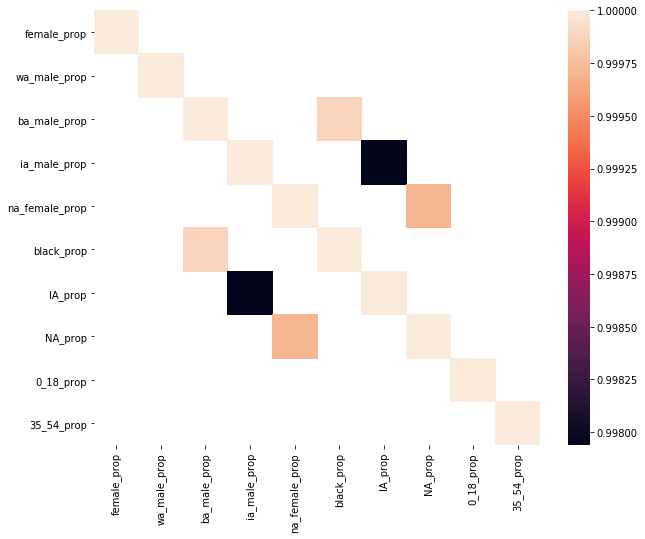

In [89]:
num_features = ['female_prop', 'wa_male_prop', 'ba_male_prop', 'ia_male_prop',
                  'na_female_prop', 'black_prop', 'IA_prop', 'NA_prop', '0_18_prop', '35_54_prop']
cor_mat = dfinal[num_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_mat[(cor_mat >= 0.7)|(cor_mat <= -0.7)], xticklabels=cor_mat.columns, yticklabels=cor_mat.columns)

In [90]:
cor_mat

,female_prop,wa_male_prop,ba_male_prop,ia_male_prop,na_female_prop,black_prop,IA_prop,NA_prop,0_18_prop,35_54_prop
female_prop,1.000000,-0.298292,0.213567,-0.219220,0.133179,0.214839,-0.178534,0.141814,-0.323374,0.393161
wa_male_prop,-0.298292,1.000000,-0.578632,0.030192,-0.633382,-0.576189,0.016456,-0.634019,-0.062005,-0.370491
ba_male_prop,0.213567,-0.578632,1.000000,-0.327830,-0.181491,0.999877,-0.320206,-0.176612,0.048135,0.349239
ia_male_prop,-0.219220,0.030192,-0.327830,1.000000,0.011353,-0.329389,0.997939,-0.001277,0.275017,-0.433071
na_female_prop,0.133179,-0.633382,-0.181491,0.011353,1.000000,-0.184349,0.018130,0.999711,0.018936,0.076427
black_prop,0.214839,-0.576189,0.999877,-0.329389,-0.184349,1.000000,-0.321725,-0.179467,0.048062,0.352916
IA_prop,-0.178534,0.016456,-0.320206,0.997939,0.018130,-0.321725,1.000000,0.005292,0.267543,-0.410863
NA_prop,0.141814,-0.634019,-0.176612,-0.001277,0.999711,-0.179467,0.005292,1.000000,0.010699,0.077928
0_18_prop,-0.323374,-0.062005,0.048135,0.275017,0.018936,0.048062,0.267543,0.010699,1.000000,-0.285707
35_54_prop,0.393161,-0.370491,0.349239,-0.433071,0.076427,0.352916,-0.410863,0.077928,-0.285707,1.000000


#### The following covariates are selected based on p-value < 0.05 and larger absoluate value of coefficient. High Correlated (|corr| >= 0.7) features are selected based on larger absolute coefficient.
#### for example, when male_prop and female_prop are both significant, select the one with larger absolute coefficient.
#### for example, when na_prop and na_feamale_prop are highly correlated, select the one with larger absolute coefficient.
- female_prop, wa_male_prop, ba_male_prop, ia_male_prop, na_female_prop, 0_18_prop, 35_54_prop
    - black_prop and 35_54_prop positively associated with log case rate.
    - IA_prop and 0_18_prop negatively associated with log case rate.

#### Step 2: Multivariate Linear Regression for Facet1p

In [91]:
for facet in ['facet1p']:
    
    covariates = ['female_prop', 'wa_male_prop', 'ba_male_prop', 'ia_male_prop',
                  'na_female_prop', '0_18_prop', '35_54_prop']
    
    facetp = dfinal[[facet] + covariates]
    
    X_p = sm.add_constant(facetp)
    model = sm.OLS(dfinal['log_case_rate'],X_p)
    results = model.fit()
    
    print('{}: {}'.format(facet, results.summary()))

facet1p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     109.6
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          3.05e-151
Time:                        13:43:33   Log-Likelihood:                -2430.5
No. Observations:                1960   AIC:                             4879.
Df Residuals:                    1951   BIC:                             4929.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.5094      1.49

#### Step 3: Remove non-significant variable
 - Remove 0_18_prop         

<font color=blue> Final model for facet1p

In [92]:
for facet in ['facet1p']:
    
    covariates = ['female_prop', 'wa_male_prop', 'ba_male_prop', 'ia_male_prop',
                  'na_female_prop', '35_54_prop']
    
    facetp = dfinal[[facet] + covariates]
    
    X_p = sm.add_constant(facetp)
    model = sm.OLS(dfinal['log_case_rate'],X_p)
    results = model.fit()
    
    print('{}: {}'.format(facet, results.summary()))

facet1p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     124.7
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.07e-151
Time:                        13:44:09   Log-Likelihood:                -2431.9
No. Observations:                1960   AIC:                             4880.
Df Residuals:                    1952   BIC:                             4924.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.9223      1.45

### Facet1p + Facet6p

In [99]:
for covariate in ['male_prop', 'female_prop',
        'wa_male_prop', 'wa_female', 
       'ba_male_prop',  'ba_female_prop', 
       'ia_male_prop',  'ia_female_prop', 
       'aa_male_prop', 'aa_female_prop', 
       'na_male_prop', 'na_female_prop',
        'white_prop', 'black_prop',  'AA_prop',  'IA_prop', 'NA_prop',
        '0_18_prop', '19_25_prop', '0_25_prop', '26_34_prop', '35_54_prop', '55_64_prop', '65_more_prop']:
    
    
    facetp = dfinal[['facet1p', 'facet6p'] + [covariate]]
    
    X_p = sm.add_constant(facetp)
    model = sm.OLS(dfinal['log_case_rate'],X_p)
    results = model.fit()
    
    print('{}: {}'.format(facet, results.summary()))

facet5p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     47.41
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           1.42e-29
Time:                        13:58:23   Log-Likelihood:                -2725.3
No. Observations:                1960   AIC:                             5459.
Df Residuals:                    1956   BIC:                             5481.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.4176      0.278    -33.876

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
facet5p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     35.88
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           1.44e-22
Time:                        13:58:24   Log-Likelihood:                -2741.6
No. Observations:                1960   AIC:                             5491.
Df Residuals:                    1956   BIC:                             5514.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [105]:
num_features = ['wa_male_prop',  'ba_male_prop',  'ia_male_prop', 
                'na_female_prop',  '26_34_prop']
cor_mat = dfinal[num_features].corr()
plt.figure(figsize=(10, 8))
# sns.heatmap(cor_mat[(cor_mat >= 0.7)|(cor_mat <= -0.7)], xticklabels=cor_mat.columns, yticklabels=cor_mat.columns)
cor_mat

,wa_male_prop,ba_male_prop,ia_male_prop,na_female_prop,26_34_prop
wa_male_prop,1.000000,-0.578632,0.030192,-0.633382,-0.073541
ba_male_prop,-0.578632,1.000000,-0.327830,-0.181491,-0.115823
ia_male_prop,0.030192,-0.327830,1.000000,0.011353,0.191396
na_female_prop,-0.633382,-0.181491,0.011353,1.000000,0.013319
26_34_prop,-0.073541,-0.115823,0.191396,0.013319,1.000000


<Figure size 720x576 with 0 Axes>

<font color=blue>wa_male_prop -0.7885, ba_male_prop 3.4091, ia_male_prop -9.8355, na_female_prop -14.889, 26_34_prop 15.3389 are selected for multivariate model.

facet1p + facet6pMultivariate model

In [106]:
covariates = ['wa_male_prop', 'ba_male_prop', 'ia_male_prop',
              'na_female_prop', '26_34_prop']

facetp = dfinal[['facet1p', 'facet6p'] + covariates]

X_p = sm.add_constant(facetp)
model = sm.OLS(dfinal['log_case_rate'],X_p)
results = model.fit()

print('{}: {}'.format(facet, results.summary()))

facet5p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     90.89
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          7.06e-115
Time:                        14:09:23   Log-Likelihood:                -2517.6
No. Observations:                1960   AIC:                             5051.
Df Residuals:                    1952   BIC:                             5096.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2395      0.95

### Final Models

<font color=blue> Facet1p

In [107]:
covariates = ['female_prop', 'wa_male_prop', 'ba_male_prop', 'ia_male_prop',
              'na_female_prop', '35_54_prop']

facetp = dfinal[['facet1p'] + covariates]

X_p = sm.add_constant(facetp)
model = sm.OLS(dfinal['log_case_rate'],X_p)
results = model.fit()

print('{}: {}'.format(facet, results.summary()))

facet5p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     124.7
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.07e-151
Time:                        14:15:40   Log-Likelihood:                -2431.9
No. Observations:                1960   AIC:                             4880.
Df Residuals:                    1952   BIC:                             4924.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.9223      1.45

<font color=blue> Facet1p + Facet6o

In [108]:
covariates = ['wa_male_prop', 'ba_male_prop', 'ia_male_prop',
              'na_female_prop', '26_34_prop']

facetp = dfinal[['facet1p', 'facet6p'] + covariates]

X_p = sm.add_constant(facetp)
model = sm.OLS(dfinal['log_case_rate'],X_p)
results = model.fit()

print('{}: {}'.format(facet, results.summary()))

facet5p:                             OLS Regression Results                            
Dep. Variable:          log_case_rate   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     90.89
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          7.06e-115
Time:                        14:15:42   Log-Likelihood:                -2517.6
No. Observations:                1960   AIC:                             5051.
Df Residuals:                    1952   BIC:                             5096.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2395      0.95